# EJercicio 1
El archivo Hawks.csv contiene mediciones de casi 900 aves de tres especies diferentes. Los datos registrados
son los siguientes:

● Epecies. Es la etiqueta de clase e indica la especie de cada gavilán: gavilanes de Cooper (CH),
gavilanes colirrojos (RT) y gavilanes rastreros (SS).

● Año. Indica el año en que se avistó el ave.

● Hallux. Indica la medida en milímetros del hallux (el dedo posterior del pie, que poseen todas las
aves cazadoras para sujetar mejor a sus presas).

● Ala. Indica la longitud en milímetros de la pluma más larga del ala.
● Peso. Indica el peso del ave en gramos.

● Cola. Indica la longitud de la cola del ave en milímetros.

### a) 
Calcule la correlación lineal entre los atributos Ala y Cola. Indique la intensidad de la correlación (no hay
correlación/débil/fuerte) y el tipo (positiva/negativa)

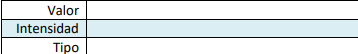


In [1]:
import pandas as pd
import numpy as np

# Cargar el archivo hawks.csv con encoding correcto
df = pd.read_csv('../../Datos/hawks.csv', sep=';', encoding='latin-1')

# Calcular la correlación entre Ala y Cola
correlacion = df['Ala'].corr(df['Cola'])

# Determinar la intensidad
if abs(correlacion) < 0.3:
    intensidad = "No hay correlación"
elif abs(correlacion) < 0.7:
    intensidad = "Débil"
else:
    intensidad = "Fuerte"

# Determinar el tipo
tipo = "Positiva" if correlacion > 0 else "Negativa"

# Crear la tabla con los resultados en formato vertical
resultado = pd.DataFrame({
    '': ['Valor', 'Intensidad', 'Tipo'],
    'Resultado': [f"{correlacion:.4f}", intensidad, tipo]
})

# Mostrar la tabla de forma más visual
display(resultado)

,,Resultado
0,Valor,0.8999
1,Intensidad,Fuerte
2,Tipo,Positiva


### b)
Complete el cuadro con los valores del atributo Hallux antes y después de normalizarlos utilizando media
y desvío. 

In [2]:
# Datos originales de Hallux
hallux_original = df['Hallux']

# Normalización usando media y desvío estándar
hallux_normalizado = (hallux_original - hallux_original.mean()) / hallux_original.std()

# Calcular estadísticas para datos sin normalizar
media_sin = hallux_original.mean()
desvio_sin = hallux_original.std()
minimo_sin = hallux_original.min()
q1_sin = hallux_original.quantile(0.25)
q2_sin = hallux_original.quantile(0.50)  # Mediana
q3_sin = hallux_original.quantile(0.75)
ric_sin = q3_sin - q1_sin
maximo_sin = hallux_original.max()

# Calcular estadísticas para datos normalizados
media_norm = hallux_normalizado.mean()
desvio_norm = hallux_normalizado.std()
minimo_norm = hallux_normalizado.min()
q1_norm = hallux_normalizado.quantile(0.25)
q2_norm = hallux_normalizado.quantile(0.50)
q3_norm = hallux_normalizado.quantile(0.75)
ric_norm = q3_norm - q1_norm
maximo_norm = hallux_normalizado.max()

# Calcular bigotes (valores extremos dentro del rango de normalidad)
# Bigote inferior = Q1 - 1.5 * RIC (pero no menor al mínimo)
# Bigote superior = Q3 + 1.5 * RIC (pero no mayor al máximo)
bigote_inf_sin = max(minimo_sin, q1_sin - 1.5 * ric_sin)
bigote_sup_sin = min(maximo_sin, q3_sin + 1.5 * ric_sin)

bigote_inf_norm = max(minimo_norm, q1_norm - 1.5 * ric_norm)
bigote_sup_norm = min(maximo_norm, q3_norm + 1.5 * ric_norm)

# Crear la tabla comparativa
tabla_hallux = pd.DataFrame({
    'Medida': ['Media', 'Desvío', 'Mínimo', 'Q1', 'Q2', 'Q3', 'RIC', 'Máximo', 
               'Bigote Inferior', 'Bigote Superior'],
    'Sin normalizar': [
        f'{media_sin:.2f}',
        f'{desvio_sin:.2f}',
        f'{minimo_sin:.2f}',
        f'{q1_sin:.2f}',
        f'{q2_sin:.2f}',
        f'{q3_sin:.2f}',
        f'{ric_sin:.2f}',
        f'{maximo_sin:.2f}',
        f'{bigote_inf_sin:.2f}',
        f'{bigote_sup_sin:.2f}'
    ],
    'Normalizado': [
        f'{media_norm:.2f}',
        f'{desvio_norm:.2f}',
        f'{minimo_norm:.2f}',
        f'{q1_norm:.2f}',
        f'{q2_norm:.2f}',
        f'{q3_norm:.2f}',
        f'{ric_norm:.2f}',
        f'{maximo_norm:.2f}',
        f'{bigote_inf_norm:.2f}',
        f'{bigote_sup_norm:.2f}'
    ]
})

print("Estadísticas del atributo Hallux:")
display(tabla_hallux)

Estadísticas del atributo Hallux:


,Medida,Sin normalizar,Normalizado
0,Media,291.77,-0.00
1,Desvío,321.32,1.00
2,Mínimo,95.00,-0.61
3,Q1,152.00,-0.43
4,Q2,295.00,0.01
5,Q3,315.00,0.07
6,RIC,163.00,0.51
7,Máximo,3414.00,9.72
8,Bigote Inferior,95.00,-0.61
9,Bigote Superior,559.50,0.83


Compare los valores obtenidos e indique el valor de verdad de las siguientes afirmaciones:

I. El valor de Q2 normalizado permite afirmar que la media y la mediana tienen valores cercanos.

II. El máximo valor de Hallux se encuentra a más de 9 desvíos por encima de la media.

III. Un hallux que mida más de 600 mm es considerado atípico extremo.

IV. Un valor normalizado del atributo “hallux” de 2 se considerará un valor atípico extremo.

V. En un gavilán es atípico que su hallux mida menos de 100 mm.



In [3]:
# Análisis de las afirmaciones

print("=" * 70)
print("ANÁLISIS DE AFIRMACIONES")
print("=" * 70)

# I. El valor de Q2 normalizado permite afirmar que la media y la mediana tienen valores cercanos
print("\nI. Q2 normalizado y relación media-mediana:")
print(f"   Q2 normalizado: {q2_norm:.4f}")
print(f"   Media normalizada: {media_norm:.4f}")
print(f"   Diferencia: {abs(q2_norm - media_norm):.4f}")
afirmacion_1 = abs(q2_norm - media_norm) < 0.1
print(f"   → VERDADERO" if afirmacion_1 else f"   → FALSO")
print(f"   (Q2 normalizado cerca de 0 indica que media y mediana son similares)")

# II. El máximo valor de Hallux se encuentra a más de 9 desvíos por encima de la media
print("\nII. Máximo en relación a la media:")
print(f"   Máximo: {maximo_sin:.2f} mm")
print(f"   Media: {media_sin:.2f} mm")
print(f"   Desvío: {desvio_sin:.2f} mm")
desvios_max = (maximo_sin - media_sin) / desvio_sin
print(f"   Desvíos por encima: {desvios_max:.2f}")
afirmacion_2 = desvios_max > 9
print(f"   → VERDADERO" if afirmacion_2 else f"   → FALSO")

# III. Un hallux que mida más de 600 mm es considerado atípico extremo
print("\nIII. Hallux > 600 mm es atípico extremo:")
print(f"   Bigote Superior: {bigote_sup_sin:.2f} mm")
print(f"   Límite atípico extremo: Q3 + 3*RIC = {q3_sin + 3*ric_sin:.2f} mm")
limite_extremo = q3_sin + 3 * ric_sin
afirmacion_3 = 600 > limite_extremo
print(f"   600 mm > {limite_extremo:.2f} mm: {afirmacion_3}")
print(f"   → VERDADERO" if afirmacion_3 else f"   → FALSO")

# IV. Un valor normalizado de 2 se considerará atípico extremo
print("\nIV. Valor normalizado de 2 es atípico extremo:")
print(f"   Bigote Superior normalizado: {bigote_sup_norm:.2f}")
limite_extremo_norm = q3_norm + 3 * ric_norm
print(f"   Límite atípico extremo normalizado: Q3 + 3*RIC = {limite_extremo_norm:.2f}")
afirmacion_4 = 2 > limite_extremo_norm
print(f"   2 > {limite_extremo_norm:.2f}: {afirmacion_4}")
print(f"   → VERDADERO" if afirmacion_4 else f"   → FALSO")

# V. En un gavilán es atípico que su hallux mida menos de 100 mm
print("\nV. Hallux < 100 mm es atípico:")
print(f"   Bigote Inferior: {bigote_inf_sin:.2f} mm")
print(f"   Límite atípico inferior: Q1 - 1.5*RIC = {q1_sin - 1.5*ric_sin:.2f} mm")
afirmacion_5 = 100 < bigote_inf_sin
print(f"   100 mm < {bigote_inf_sin:.2f} mm: {afirmacion_5}")
print(f"   → VERDADERO" if afirmacion_5 else f"   → FALSO")

print("\n" + "=" * 70)
print("RESUMEN DE AFIRMACIONES")
print("=" * 70)
print(f"I.   {'VERDADERO ✓' if afirmacion_1 else 'FALSO ✗'}")
print(f"II.  {'VERDADERO ✓' if afirmacion_2 else 'FALSO ✗'}")
print(f"III. {'VERDADERO ✓' if afirmacion_3 else 'FALSO ✗'}")
print(f"IV.  {'VERDADERO ✓' if afirmacion_4 else 'FALSO ✗'}")
print(f"V.   {'VERDADERO ✓' if afirmacion_5 else 'FALSO ✗'}")
print("=" * 70)

ANÁLISIS DE AFIRMACIONES

I. Q2 normalizado y relación media-mediana:
   Q2 normalizado: 0.0100
   Media normalizada: -0.0000
   Diferencia: 0.0100
   → VERDADERO
   (Q2 normalizado cerca de 0 indica que media y mediana son similares)

II. Máximo en relación a la media:
   Máximo: 3414.00 mm
   Media: 291.77 mm
   Desvío: 321.32 mm
   Desvíos por encima: 9.72
   → VERDADERO

III. Hallux > 600 mm es atípico extremo:
   Bigote Superior: 559.50 mm
   Límite atípico extremo: Q3 + 3*RIC = 804.00 mm
   600 mm > 804.00 mm: False
   → FALSO

IV. Valor normalizado de 2 es atípico extremo:
   Bigote Superior normalizado: 0.83
   Límite atípico extremo normalizado: Q3 + 3*RIC = 1.59
   2 > 1.59: True
   → VERDADERO

V. Hallux < 100 mm es atípico:
   Bigote Inferior: 95.00 mm
   Límite atípico inferior: Q1 - 1.5*RIC = -92.50 mm
   100 mm < 95.00 mm: False
   → FALSO

RESUMEN DE AFIRMACIONES
I.   VERDADERO ✓
II.  VERDADERO ✓
III. FALSO ✗
IV.  VERDADERO ✓
V.   FALSO ✗
